In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup for better visuals
pd.set_option('display.max_columns', None)
# Update the path to your downloaded file
df = pd.read_csv("C:/Users/kanmani/Desktop/AutoStack360/Data/Cleaned/df_with_country_encoded.csv")


In [2]:
print(df['EdLevel'].unique())


['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school']


In [3]:
#simplyfing
df['EdLevel'] = df['EdLevel'].replace({
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s",
    "Some college/university study without earning a degree": "Some College",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
    "Primary/elementary school": "Primary School",
    "Something else": "Other"
})


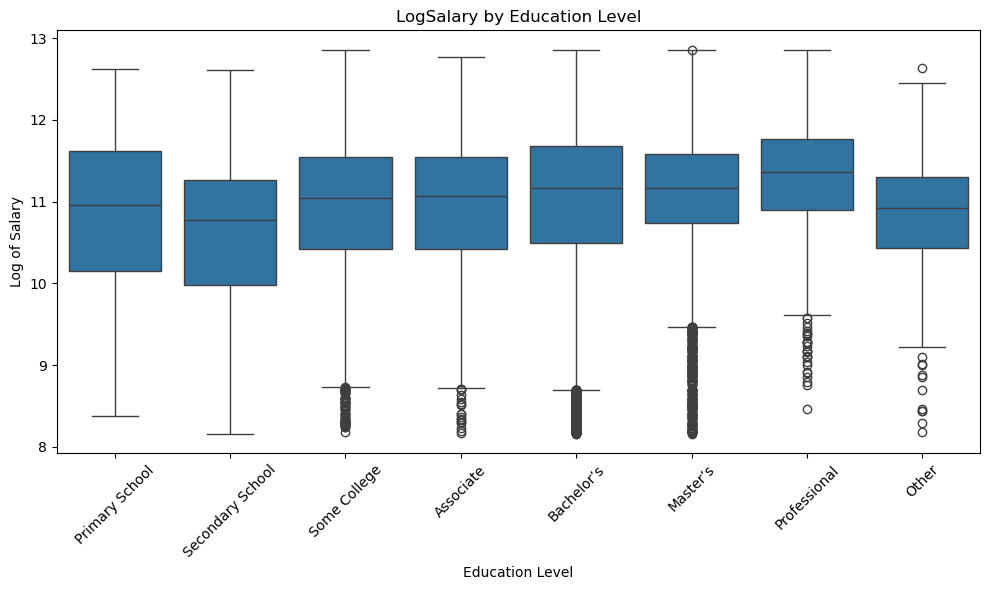

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='EdLevel', y='LogSalary', data=df,
    order=[
        "Primary School", "Secondary School", "Some College",
        "Associate", "Bachelor’s", "Master’s", "Professional", "Other"
    ]
)
plt.xticks(rotation=45)
plt.title("LogSalary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Log of Salary")
plt.tight_layout()
plt.show()



In [5]:
#One-Hot Encode EdLevel
df = pd.get_dummies(df, columns=['EdLevel'], drop_first=True)


In [6]:
# Get only EdLevel columns
edlevel_cols = [col for col in df.columns if col.startswith('EdLevel_')]

# Compute correlation with LogSalary
correlations = df[edlevel_cols + ['LogSalary']].corr()['LogSalary'].drop('LogSalary')

# Display sorted correlations
print(correlations.sort_values(ascending=False))

EdLevel_Master’s            0.065375
EdLevel_Professional        0.062998
EdLevel_Bachelor’s         -0.008674
EdLevel_Primary School     -0.014044
EdLevel_Other              -0.020411
EdLevel_Some College       -0.028216
EdLevel_Secondary School   -0.101532
Name: LogSalary, dtype: float64


In [7]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Currency',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       '

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# Ensure all entries are strings and fill NaNs
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('').astype(str)

# Convert semicolon-separated strings to lists
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if x.strip() != '' else [])

# Binarize the multi-label data
mlb = MultiLabelBinarizer()
language_dummies = pd.DataFrame(
    mlb.fit_transform(df['LanguageHaveWorkedWith']),
    columns=mlb.classes_,
    index=df.index
)

# Concatenate the binary columns with original DataFrame
df = pd.concat([df, language_dummies], axis=1)


In [9]:
#correlation
# Get all language columns (from MultiLabelBinarizer)
language_cols = mlb.classes_

# Compute correlation with LogSalary
language_corr = df[list(language_cols) + ['LogSalary']].corr()['LogSalary'].drop('LogSalary')

# Sort and display
print(language_corr.sort_values(ascending=False))


Bash/Shell (all shells)    0.134125
Ruby                       0.080798
Go                         0.067787
Rust                       0.066348
Elixir                     0.065423
Scala                      0.065310
Clojure                    0.053273
Groovy                     0.046884
Erlang                     0.044254
PowerShell                 0.043534
Perl                       0.041705
Python                     0.034382
Swift                      0.033088
Lisp                       0.028680
Lua                        0.025968
Objective-C                0.022430
F#                         0.022028
Apex                       0.021468
Fortran                    0.017987
OCaml                      0.014001
Julia                      0.013198
Zig                        0.011372
MicroPython                0.011187
TypeScript                 0.007686
Crystal                    0.006487
Haskell                    0.004776
Cobol                      0.004695
Zephyr                     0

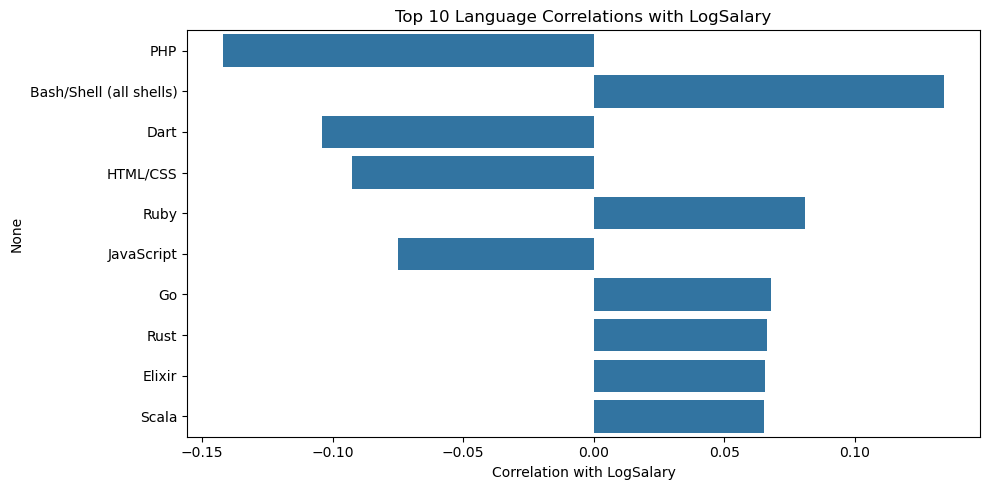

In [10]:
# Top 10 absolute correlations (strongest positive or negative)
top_langs = language_corr.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 5))
sns.barplot(x=language_corr[top_langs].values, y=top_langs)
plt.title("Top 10 Language Correlations with LogSalary")
plt.xlabel("Correlation with LogSalary")
plt.tight_layout()
plt.show()

In [11]:
# Drop the original column
df.drop(columns=['LanguageHaveWorkedWith'], inplace=True)

# Save the DataFrame to CSV
output_path = r"C:\Users\kanmani\Desktop\AutoStack360\Data\Cleaned\survey_with_language_nd_Edlevel_binaries.csv"
df.to_csv(output_path, index=False)

print("File saved successfully at:")
print(output_path)

File saved successfully at:
C:\Users\kanmani\Desktop\AutoStack360\Data\Cleaned\survey_with_language_nd_Edlevel_binaries.csv
